<a href="https://colab.research.google.com/github/abhisheksaxena1998/FluidLedger/blob/master/SerumLedger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('transfusion.data')
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


The data has 5 columns, which means:
Recency (months): Number of months since last donation.
Frequency (times): Total number of donations.
Monetary (c.c. blood): Total blood donated in c.c.
Time (months): Number of months since first donation.
whether he/she donated blood in March 2007: Target class.

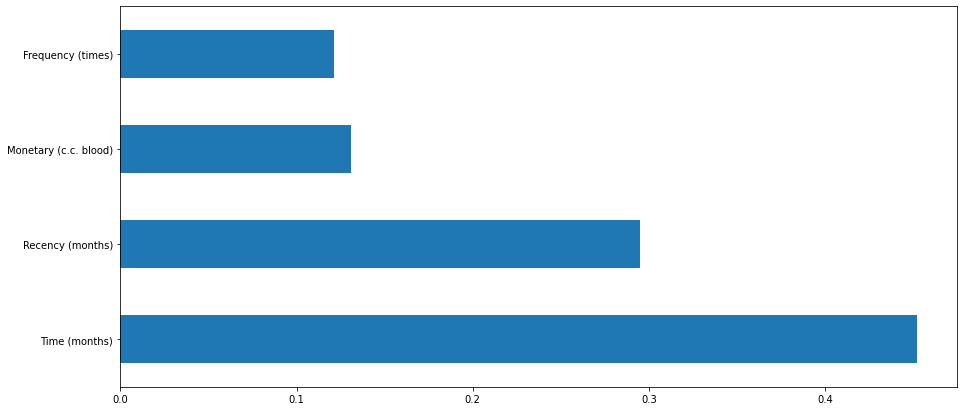

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression

X = df.iloc[:,0:4]  #independent columns
y = df.iloc[:,-1]    #target column 
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
fig, ax = plt.subplots(figsize=(15,7))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=42)

AdaBoostClassifier

In [16]:
from sklearn.ensemble import AdaBoostClassifier

 
clf = AdaBoostClassifier(n_estimators=1000, random_state=0)
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

0.8320950965824666

In [17]:
predictions = model.predict((X_test))


In [18]:
print('accuracy %s' % accuracy_score(predictions, y_test))
print(classification_report(y_test, predictions,target_names=['1','-1']))

accuracy 0.96
              precision    recall  f1-score   support

           1       0.95      1.00      0.98        60
          -1       1.00      0.80      0.89        15

    accuracy                           0.96        75
   macro avg       0.98      0.90      0.93        75
weighted avg       0.96      0.96      0.96        75



In [20]:
acc_ada_train=[]
for i in range(9):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=(i+1)/10, random_state = 42)

    ada = AdaBoostClassifier(n_estimators=1000, random_state=0)
    ada.fit(X_train,y_train)
    y_pred = ada.predict(X_test)
    acc_ada_train.append(accuracy_score(y_pred, y_test))
    print('accuracy %s' % accuracy_score(y_pred, y_test))
print (acc_ada_train)

accuracy 0.7373887240356083
accuracy 0.7262103505843072
accuracy 0.75
accuracy 0.7527839643652561
accuracy 0.7352941176470589
accuracy 0.7433333333333333
accuracy 0.7377777777777778
accuracy 0.76
accuracy 0.8133333333333334
[0.7373887240356083, 0.7262103505843072, 0.75, 0.7527839643652561, 0.7352941176470589, 0.7433333333333333, 0.7377777777777778, 0.76, 0.8133333333333334]


In [21]:
acc_ada_test=[]
for i in range(9):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(i+1)/10, random_state = 42)

    ada = AdaBoostClassifier(n_estimators=1000, random_state=0)
    ada.fit(X_train,y_train)
    y_pred = ada.predict(X_test)
    acc_ada_test.append(accuracy_score(y_pred, y_test))
    print('accuracy %s' % accuracy_score(y_pred, y_test))
print (acc_ada_test)

accuracy 0.8133333333333334
accuracy 0.76
accuracy 0.7377777777777778
accuracy 0.7433333333333333
accuracy 0.7352941176470589
accuracy 0.7527839643652561
accuracy 0.75
accuracy 0.7262103505843072
accuracy 0.7373887240356083
[0.8133333333333334, 0.76, 0.7377777777777778, 0.7433333333333333, 0.7352941176470589, 0.7527839643652561, 0.75, 0.7262103505843072, 0.7373887240356083]


Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', multi_class='auto',max_iter=100)
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

# Predict the transformed test documents
predictions = model.predict((X_test))

print('AUC: ', multiclass_roc_auc_score(y_test, predictions))

AUC:  0.543113342898135


In [24]:
print('accuracy %s' % accuracy_score(predictions, y_test))
print(classification_report(y_test, predictions,target_names=['1','-1']))

accuracy 0.7655786350148368
              precision    recall  f1-score   support

           1       0.77      0.98      0.86       510
          -1       0.60      0.11      0.19       164

    accuracy                           0.77       674
   macro avg       0.69      0.54      0.52       674
weighted avg       0.73      0.77      0.70       674



In [26]:
acc_log_train=[]
for i in range(9):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=(i+1)/10, random_state = 42)

    log = LogisticRegression(solver='lbfgs', multi_class='auto',max_iter=100)
    log.fit(X_train,y_train)
    y_pred = log.predict(X_test)
    acc_log_train.append(accuracy_score(y_pred, y_test))
    print('accuracy %s' % accuracy_score(y_pred, y_test))
print (acc_log_train)

accuracy 0.7655786350148368
accuracy 0.7679465776293823
accuracy 0.7614503816793893
accuracy 0.7461024498886414
accuracy 0.7540106951871658
accuracy 0.7366666666666667
accuracy 0.7377777777777778
accuracy 0.76
accuracy 0.7866666666666666
[0.7655786350148368, 0.7679465776293823, 0.7614503816793893, 0.7461024498886414, 0.7540106951871658, 0.7366666666666667, 0.7377777777777778, 0.76, 0.7866666666666666]


In [27]:
acc_log_test=[]
for i in range(9):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(i+1)/10, random_state = 42)

    log = LogisticRegression(solver='lbfgs', multi_class='auto',max_iter=100)
    log.fit(X_train,y_train)
    y_pred = log.predict(X_test)
    acc_log_test.append(accuracy_score(y_pred, y_test))
    print('accuracy %s' % accuracy_score(y_pred, y_test))
print (acc_log_test)

accuracy 0.7866666666666666
accuracy 0.76
accuracy 0.7377777777777778
accuracy 0.7366666666666667
accuracy 0.7540106951871658
accuracy 0.7461024498886414
accuracy 0.7614503816793893
accuracy 0.7679465776293823
accuracy 0.7655786350148368
[0.7866666666666666, 0.76, 0.7377777777777778, 0.7366666666666667, 0.7540106951871658, 0.7461024498886414, 0.7614503816793893, 0.7679465776293823, 0.7655786350148368]


Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=400,criterion='entropy')
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing


predictions = model.predict((X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.5873146819703491


In [30]:
model.score(X_train,y_train)

1.0

In [31]:
print('accuracy %s' % accuracy_score(predictions, y_test))
print(classification_report(y_test, predictions,target_names=['1','-1']))

accuracy 0.7729970326409495
              precision    recall  f1-score   support

           1       0.79      0.95      0.86       510
          -1       0.59      0.23      0.33       164

    accuracy                           0.77       674
   macro avg       0.69      0.59      0.59       674
weighted avg       0.74      0.77      0.73       674



In [33]:
acc_ran_train=[]
for i in range(9):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=(i+1)/10, random_state = 42)

    ran = RandomForestClassifier(n_estimators=400,criterion='entropy')
    ran.fit(X_train,y_train)
    y_pred = ran.predict(X_test)
    acc_ran_train.append(accuracy_score(y_pred, y_test))
    print('accuracy %s' % accuracy_score(y_pred, y_test))
print (acc_ran_train)

accuracy 0.7670623145400594
accuracy 0.7662771285475793
accuracy 0.7557251908396947
accuracy 0.7594654788418709
accuracy 0.7433155080213903
accuracy 0.7466666666666667
accuracy 0.7288888888888889
accuracy 0.7066666666666667
accuracy 0.72
[0.7670623145400594, 0.7662771285475793, 0.7557251908396947, 0.7594654788418709, 0.7433155080213903, 0.7466666666666667, 0.7288888888888889, 0.7066666666666667, 0.72]


In [35]:
acc_ran_test=[]
for i in range(9):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(i+1)/10, random_state = 42)

    ran = RandomForestClassifier(n_estimators=400,criterion='entropy')
    ran.fit(X_train,y_train)
    y_pred = ran.predict(X_test)
    acc_ran_test.append(accuracy_score(y_pred, y_test))
    print('accuracy %s' % accuracy_score(y_pred, y_test))
print (acc_ran_test)

accuracy 0.76
accuracy 0.7266666666666667
accuracy 0.7333333333333333
accuracy 0.74
accuracy 0.7406417112299465
accuracy 0.7594654788418709
accuracy 0.7557251908396947
accuracy 0.7629382303839732
accuracy 0.7655786350148368
[0.76, 0.7266666666666667, 0.7333333333333333, 0.74, 0.7406417112299465, 0.7594654788418709, 0.7557251908396947, 0.7629382303839732, 0.7655786350148368]


SVM Classifier

In [36]:
from sklearn import svm


clf = svm.SVC(kernel='linear')
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

0.8108108108108109

In [37]:
predictions = clf.predict((X_test))

In [38]:
print('accuracy %s' % accuracy_score(predictions, y_test))
print(classification_report(y_test, predictions,target_names=['1','-1']))

accuracy 0.7566765578635015
              precision    recall  f1-score   support

           1       0.76      1.00      0.86       510
          -1       0.00      0.00      0.00       164

    accuracy                           0.76       674
   macro avg       0.38      0.50      0.43       674
weighted avg       0.57      0.76      0.65       674



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
acc_svm_train=[]
for i in range(9):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=(i+1)/10, random_state = 42)
    from sklearn import svm

    svm = svm.SVC(kernel='linear')
    svm.fit(X_train,y_train)
    y_pred = svm.predict(X_test)
    acc_svm_train.append(accuracy_score(y_pred, y_test))
    print('accuracy %s' % accuracy_score(y_pred, y_test))
print (acc_svm_train)

accuracy 0.7566765578635015
accuracy 0.7729549248747913
accuracy 0.7576335877862596
accuracy 0.7461024498886414
accuracy 0.7620320855614974
accuracy 0.75
accuracy 0.7466666666666667
accuracy 0.76
accuracy 0.76
[0.7566765578635015, 0.7729549248747913, 0.7576335877862596, 0.7461024498886414, 0.7620320855614974, 0.75, 0.7466666666666667, 0.76, 0.76]


In [ ]:
acc_svm_test=[]
for i in range(9):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(i+1)/10, random_state = 42)
    from sklearn import svm

    svm = svm.SVC(kernel='linear')
    svm.fit(X_train,y_train)
    y_pred = svm.predict(X_test)
    acc_svm_test.append(accuracy_score(y_pred, y_test))
    print('accuracy %s' % accuracy_score(y_pred, y_test))
print (acc_svm_test)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
y1=acc_ada_test
y2=acc_ran_test
y3=acc_log_test
y4=acc_svm_test
sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(15,7),dpi=1000)

plt.plot(x,y1,'r-',label='ADA BOOST')
plt.plot(x,y2,'b-',label='RANDOM FOREST')
plt.plot(x,y3,'g-',label='LOGISTIC REGRESSION')
plt.plot(x,y4,'m-',label='SVM')


ax.legend( prop={'size': 18})

ax.set_xlabel('Fraction of test data',fontsize=20)
ax.set_ylabel('Accuracy of classifier',fontsize=20)
ax.set_title("Effect of varying test data on Classifier Accuracy",fontsize=20)

ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
y1=acc_ada_train
y2=acc_ran_train
y3=acc_log_train
y4=acc_svm_train
sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(15,7),dpi=1000)

plt.plot(x,y1,'r-',label='ADA BOOST')
plt.plot(x,y2,'b-',label='RANDOM FOREST')
plt.plot(x,y3,'g-',label='LOGISTIC REGRESSION')
plt.plot(x,y4,'m-',label='SVM')


ax.legend( prop={'size': 18})

ax.set_xlabel('Fraction of Train data',fontsize=20)
ax.set_ylabel('Accuracy of classifier',fontsize=20)
ax.set_title("Effect of varying Train data on Classifier Accuracy",fontsize=20)

ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)

